# Random Forest - ансамбль решающих деревьев

## Что такое Random Forest?

**Random Forest** — это ансамблевый метод, который объединяет множество случайных решающих деревьев для улучшения точности и устойчивости модели.

* Он уменьшает переобучение (*variance*), характерное для одиночного дерева, благодаря усреднению результатов множества деревьев.
* Каждый дерево обучается на случайной выборке объектов (*bootstrap sampling*) и случайным наборе признаков для разделения (*feature bagging*).
* В итоге для регрессии берётся среднее предсказание всех деревьев; для классификации — большинство голосов (*majority voting*).

**Аналогия:** если решающее дерево — это один эксперт, Random Forest — это группа экспертов, каждый работает по чуть разным данным и своим правилам. Консенсус этой группы даёт более точный и надёжный результат.

## Сравнение с одиночным деревом

|Сравнение|	Decision Tree|	Random Forest|
|-------|------|------|
|Интерпретируемость|	Высокая|	Низкая|
|Склонность к переобучению|	Высокая|	Низкая|
|Устойчивость к шуму|	Низкая|	Высокая|
|Требуемое время обучения|	Низкое|	Выше|
|Обработка большого числа фич|	Ограничена|	Эффективна благодаря усреднению|

## Как работает Random Forest

1. Генерация bootstrap-выборок из обучающих данных.
2. Строительство дерева на каждой bootstrap-выборке.
3. При каждом узле выбирается случайный набор признаков (max_features).
4. Итоговый прогноз = среднее от деревьев (регрессия) или большинство голосов (классификация).

## Пример работы на синтетических данных

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [4]:
np.random.seed(42)
X = np.sort(5 * np.random.rand(200, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.3, size = X.shape[0])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
#Для сравнения результатов
tree = DecisionTreeRegressor(max_depth=4, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

In [8]:
rf = RandomForestRegressor(n_estimators=100, max_features='sqrt', max_depth=6, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

 ```n_estimators```: число деревьев в ансамбле (часто 100–500)\
 ```max_features```: сколько признаков случайно выбирать при каждом разбиении (например, sqrt(N))\
 ```max_depth```, ```min_samples_split```, ```min_samples_leaf```: ограничивают глубину и структуру каждого дерева

In [10]:
print("Decision Tree:\n MSE:", mean_squared_error(y_test, y_pred_tree), "R2:", r2_score(y_test, y_pred_tree))
print("Random Forest:\n MSE:", mean_squared_error(y_test, y_pred_rf), "R2:", r2_score(y_test, y_pred_rf))

Decision Tree:
 MSE: 0.1348296040908126 R2: 0.7823572709137966
Random Forest:
 MSE: 0.13035075475936092 R2: 0.7895870554869717


In [12]:
#Важность признаков — здесь только один признак, но пример:
importances = rf.feature_importances_
print("Feature importance:", importances)

Feature importance: [1.]


In [13]:
#Данные для визуализации
X_grid = np.arange(X.min(), X.max(), 0.01)[:, np.newaxis]
y_pred_grid = rf.predict(X_grid)

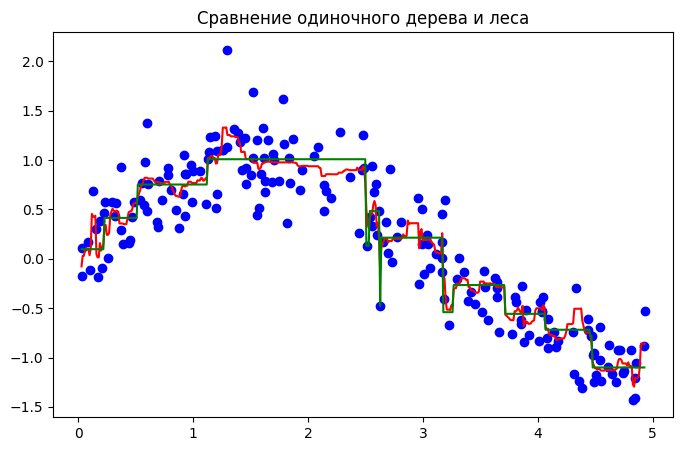

In [16]:
%matplotlib inline
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue')
plt.plot(X_grid, y_pred_grid, color='red')
plt.plot(X_grid, tree.predict(X_grid), color='green')
plt.title("Сравнение одиночного дерева и леса")
plt.show()